# Artificial Neural Network

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

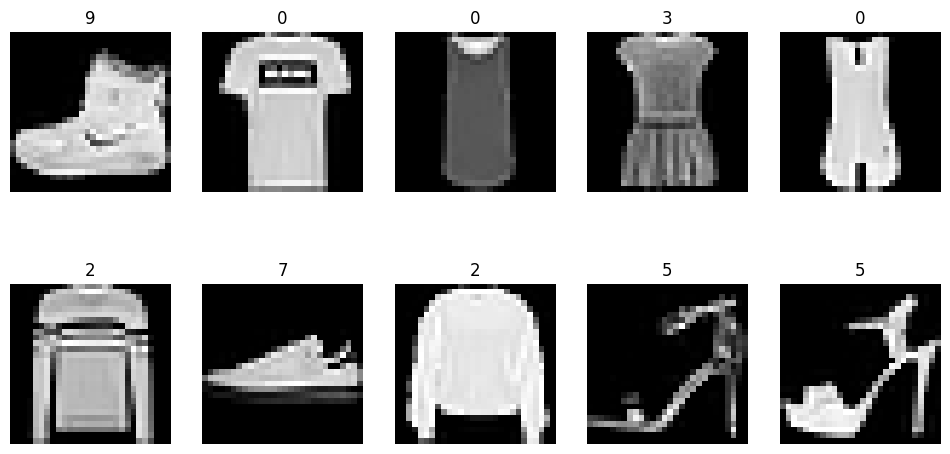

In [21]:
import matplotlib.pyplot as plt

# Display the first 10 images from the training set
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
axs = axs.ravel()
for i in range(10):
    axs[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(y_train[i])
    axs[i].axis('off')
plt.show()


In [9]:
model = Sequential([
    Dense(units=128, activation = 'relu', input_shape = (784,), name='layer1'),
    Dropout(0.2, name='layer2'),
    Dense(units=10, activation= 'linear', name='layer3')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 layer2 (Dropout)            (None, 128)               0         
                                                                 
 layer3 (Dense)              (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
#W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print("W1 shape = {}, b1 shape = {}".format(W1.shape, b1.shape))
#print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print("W3 shape = {}, b3 shape = {}".format(W3.shape, b3.shape))

W1 shape = (784, 128), b1 shape = (128,)
W3 shape = (128, 10), b3 shape = (10,)


In [18]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['sparse_categorical_accuracy'])

In [19]:
model.fit(X_train, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5386 - sparse_categorical_accuracy: 0.8089
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3999 - sparse_categorical_accuracy: 0.8564
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3674 - sparse_categorical_accuracy: 0.8664
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3473 - sparse_categorical_accuracy: 0.8732
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3289 - sparse_categorical_accuracy: 0.8784


In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.3597 - sparse_categorical_accuracy: 0.8715
